In [86]:
import pandas as pd
import numpy as np
import random
import warnings
from logistics_reg import LogisticRegression, create_10_fold, make_fold_report

In [87]:
warnings.filterwarnings(action='ignore')

### 2. Implement logistic regression
+ verify that your codes are working properly using Iris data only with samples of “virginica” and “versicolor”

In [114]:
data = pd.read_csv('./datasets/iris.csv')
data = data[data.Species.isin(['Iris-versicolor', 'Iris-virginica'])]
data['Species'] = data.Species.map({'Iris-versicolor':0, 'Iris-virginica':1})
tmp_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
data.iloc[:, :4] = (tmp_X - tmp_X.min(axis=0)) / (tmp_X.max(axis=0) - tmp_X.min(axis=0))
df_shuffled=data.sample(frac=1).reset_index(drop=True)

In [115]:
train_sample = int(df_shuffled.shape[0] * 0.7)
train_X = df_shuffled.iloc[:train_sample,:4].values
test_X = df_shuffled.iloc[train_sample:,:4].values
train_y = df_shuffled.iloc[:train_sample, 4].values
test_y = df_shuffled.iloc[train_sample:, 4].values

In [116]:
logistic_reg = LogisticRegression(max_iter=1000, verbose=True)
logistic_reg.fit(train_X, train_y)

iter: 0, loss : 48.520304639203914
iter: 100, loss : 15.595735585210145
iter: 200, loss : 8.262059919954899
iter: 300, loss : 6.177313694718827
iter: 400, loss : 5.586350713363604
iter: 500, loss : 5.477070440412364
iter: 600, loss : 5.466723430771204
Convergence iter: 626, loss : 5.466350134853005 , delta_nll : 9.89313516708279e-06


In [117]:
y_pred = logistic_reg.predict(test_X)

In [118]:
logistic_reg.confusion_mat(test_y, y_pred, outputs=True)

Predicted,0,1
Actual,,
0,17,0
1,1,12


In [121]:
logistic_reg.w

array([-21.38837723,  -2.83062589,  -9.02758258,  32.3780775 ,
        24.20976317])

In [119]:
logistic_reg.cls_metric()

accuracy :  0.9667
recall(sensitivity) :  0.9231
precision :  1.0
True Negative Rate(specificity) :  1.0
f1-score :  0.96


+ The result of training the train and test data divided by 7 to 3 is as above.

### 3. Evaluate the generalized performance using 10-fold cross validation.
- You must show the results in terms of confusion matrix, accuracy, AUC, sensitivity, and specificity for the whole dataset (one time estimation) and training sets as well as the test sets.

In [96]:
X = df_shuffled.iloc[:,:4].values
y = df_shuffled.iloc[:, 4].values

#### K-fold cross-validation
+ Divide the whole datasets into k part.
+ The prediction function is learned using K-1 folds, and the fold left out is used for test.
+ Repeat the procedure K times, rotating the test sts.
+ The 10 cross-validation results are summarized in the table below.

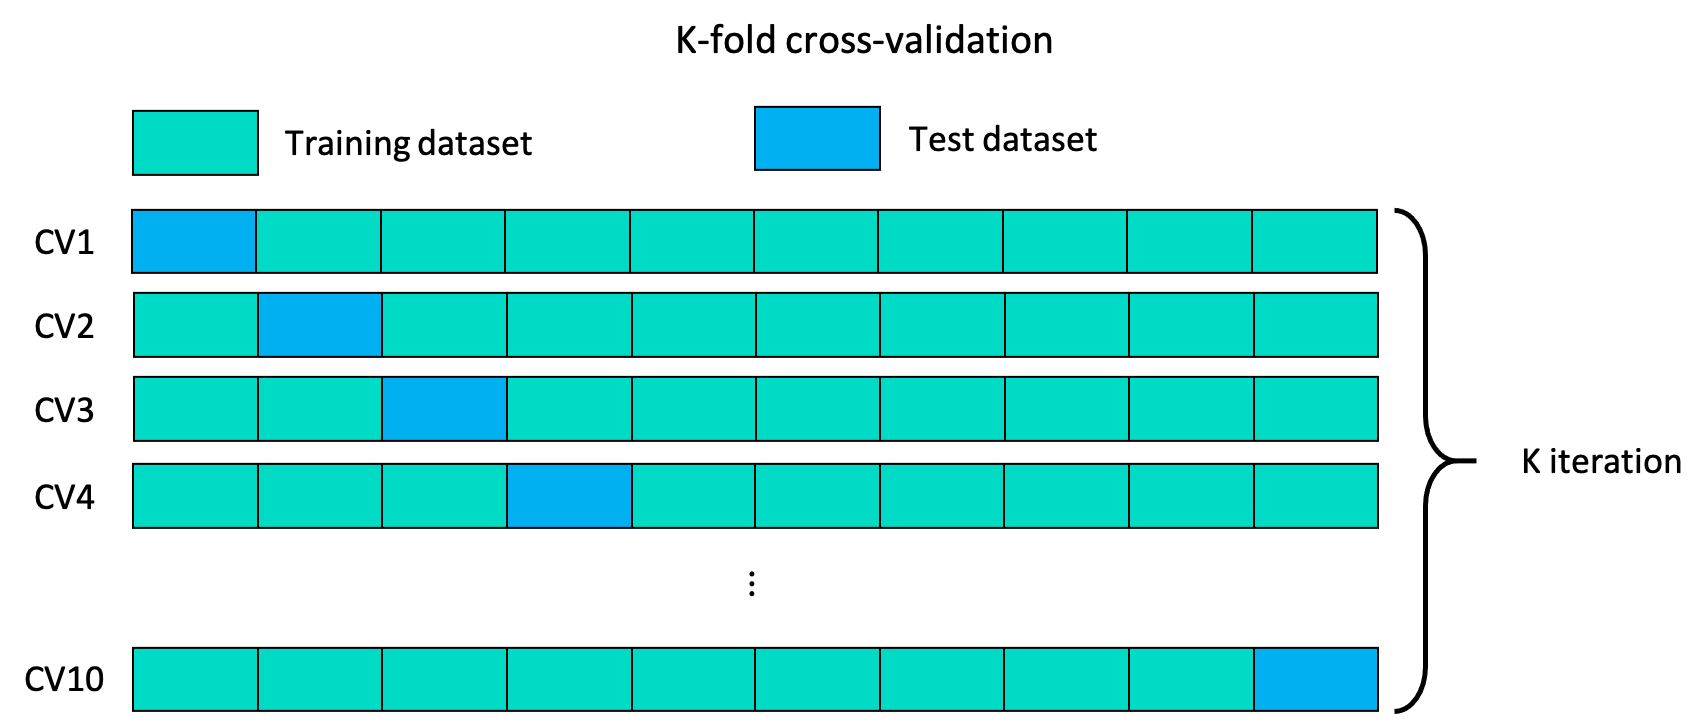

In [139]:
from IPython.display import Image
Image('img/K-fold.png')

In [97]:
fold_data, cf_mat = make_fold_report(X, y, verbose=False)
fold_data

,Accuracy,recall,precision,specificity,f1-score,AUC
CV 01,0.900000,0.857143,1.00,1.000000,0.923077,0.928571
CV 02,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
CV 03,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
CV 04,0.800000,1.000000,0.60,0.714286,0.750000,0.928571
CV 05,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
CV 06,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
CV 07,0.800000,1.000000,0.60,0.714286,0.750000,0.857143
CV 08,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
CV 09,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
CV 10,1.000000,1.000000,1.00,1.000000,1.000000,1.000000


### Appendix : Confision matrix for each cross validation data

#### Cross Validation 1 confusion matrix

In [98]:
cf_mat[0]

Predicted,0,1
Actual,,
0,3,0
1,1,6


#### Cross Validation 2 confusion matrix

In [99]:
cf_mat[1]

Predicted,0,1
Actual,,
0,4,0
1,0,6


#### Cross Validation 3 confusion matrix

In [100]:
cf_mat[2]

Predicted,0,1
Actual,,
0,7,0
1,0,3


#### Cross Validation 4 confusion matrix

In [101]:
cf_mat[3]

Predicted,0,1
Actual,,
0,5,2
1,0,3


#### Cross Validation 4 confusion matrix

In [102]:
cf_mat[3]

Predicted,0,1
Actual,,
0,5,2
1,0,3


#### Cross Validation 5 confusion matrix

In [103]:
cf_mat[4]

Predicted,0,1
Actual,,
0,5,0
1,0,5


#### Cross Validation 6 confusion matrix

In [104]:
cf_mat[5]

Predicted,0,1
Actual,,
0,3,0
1,0,7


#### Cross Validation 7 confusion matrix

In [105]:
cf_mat[6]

Predicted,0,1
Actual,,
0,5,2
1,0,3


#### Cross Validation 8 confusion matrix

In [106]:
cf_mat[7]

Predicted,0,1
Actual,,
0,4,0
1,0,6


#### Cross Validation 9 confusion matrix

In [107]:
cf_mat[8]

Predicted,0,1
Actual,,
0,4,0
1,0,6


#### Cross Validation 10 confusion matrix

In [108]:
cf_mat[9]

Predicted,0,1
Actual,,
0,6,0
1,0,4
